# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [65]:
# imports
import panel as pn
from panel.interact import interact
from panel import widgets
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv

import warnings
warnings.filterwarnings('ignore')


In [122]:
# Read the Mapbox API key
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

load_dotenv()
Mapbox_API_key=os.getenv("Mapbox_API_key")

## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [6]:
# Calculate the mean number of housing units per year (hint: use groupby) 

sfo_data.groupby(['year', 'housing_units']).mean()

,,sale_price_sqr_foot,gross_rent
year,housing_units,,
2010,372560,369.344353,1239.0
2011,374507,341.903429,1530.0
2012,376454,399.389968,2324.0
2013,378401,483.600304,2971.0
2014,380348,556.277273,3528.0
2015,382295,632.540352,3739.0
2016,384242,697.643709,4390.0


In [102]:
# Calculate the minimum number of housing units per year 
print("The minimum number of 'housing_units' is :")
print(sfo_data['housing_units'].min())

The minimum number of 'housing_units' is :
372560


In [8]:
# Calculate the maximum number of housing units per year 
print("The maximum number of 'housing_units' is :")
print(sfo_data['housing_units'].max())

The maximum number of 'housing_units' is :
384242


In [108]:
# Calculate the standard deviation of housing units per year 

print("The standard deviation of 'housing_units' is :")
print(round(sfo_data['housing_units'].std()))

The standard deviation of 'housing_units' is :
3824


In [10]:
# Save the dataframe as a csv file
sfo_data.to_csv(index=False)

'neighborhood,sale_price_sqr_foot,housing_units,gross_rent\r\nAlamo Square,291.1829454722909,372560,1239\r\nAnza Vista,267.9325826799483,372560,1239\r\nBayview,170.09866536400102,372560,1239\r\nBuena Vista Park,347.39491940371136,372560,1239\r\nCentral Richmond,319.0276225530687,372560,1239\r\nCentral Sunset,418.1724927089675,372560,1239\r\nCorona Heights,369.3593380041366,372560,1239\r\nCow Hollow,569.3799679261333,372560,1239\r\nCroker Amazon,165.64573006507914,372560,1239\r\nDiamond Heights,456.9308221979013,372560,1239\r\nDowntown ,241.80455206485135,372560,1239\r\nEureka Valley/Dolores Heights,403.1183126490986,372560,1239\r\nExcelsior,364.9283357085176,372560,1239\r\nFinancial District North,401.7499665916537,372560,1239\r\nFinancial District South,162.82121004772353,372560,1239\r\nForest Knolls,209.04932663469447,372560,1239\r\nGlen Park,715.5864380979737,372560,1239\r\nGolden Gate Heights,551.8011188234774,372560,1239\r\nHaight Ashbury,254.47377914469143,372560,1239\r\nHayes Va

In [71]:
# Use the Pandas plot function to plot the average housing units per year.
sfo_data.hvplot.bar(x='year',y='housing_units', xlim=[2010, 2016], ylim=[360000, 400000]).opts(
    yformatter="%.0f",
    title="San Franscisco Avg Housing Units By Year")


:Bars   [year]   (housing_units)

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [111]:
# Calculate the average sale price per square foot and average gross rent
print("The average housing sales price per square foot in San Fransisco from 2010 to 2016 was")
print(round(sfo_data['sale_price_sqr_foot'].mean()))

print("The minimum price per square foot in San Fransisco from 2010 to 2016 was")
print(round(sfo_data['sale_price_sqr_foot'].min()))

print("The maximum price per square foot in San Fransisco from 2010 to 2016 was")
print(round(sfo_data['sale_price_sqr_foot'].max()))

print("The minimum gross rent in San Fransisco form 2010 to 2016 was")
print(sfo_data['gross_rent'].min())

print("The maximum gross rent in San Fransisco form 2010 to 2016 was")
print(sfo_data['gross_rent'].max())

print("The average gross rent in San Fransisco form 2010 to 2016 was")
print(round(sfo_data['gross_rent'].mean()))

The average housing sales price per square foot in San Fransisco from 2010 to 2016 was
489
The minimum price per square foot in San Fransisco from 2010 to 2016 was
41
The maximum price per square foot in San Fransisco from 2010 to 2016 was
2259
The minimum gross rent in San Fransisco form 2010 to 2016 was
1239
The maximum gross rent in San Fransisco form 2010 to 2016 was
4390
The average gross rent in San Fransisco form 2010 to 2016 was
2766


In [29]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
avg_sales_price_per_sf=sfo_data['sale_price_sqr_foot']
avg_sales_price_per_sf.hvplot.line(
    label='Average Sales Price Per Square Foot in San Fransisco',
    x='year',
    y='sale_price_sqr_foot')

:Curve   [year]   (sale_price_sqr_foot)

In [30]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
avg_sales_price_per_sf=sfo_data['sale_price_sqr_foot']
avg_sales_price_per_sf.hvplot.line(
    label='Average Sales Price Per Square Foot in San Fransisco', 
    x='gross_rent', 
    y='sale_price_sqr_foot')

:Curve   [gross_rent]   (sale_price_sqr_foot)

In [33]:
# Line chart for average montly rent
gross_rent=sfo_data['gross_rent']
gross_rent.hvplot.line(x='year',y='gross_rent')

:Curve   [year]   (gross_rent)

- - - 

In [35]:
avg_sales_price_per_sf.hvplot.line(
    label='Average Sales Price Per Square Foot in San Fransisco', 
    x='year', y='sale_price_sqr_foot')
    
    + gross_rent.hvplot.line(
        x='year',
        y='gross_rent')

:Layout
   .Curve.Average_Sales_Price_Per_Square_Foot_in_San_Fransisco :Curve   [year]   (sale_price_sqr_foot)
   .Curve.Gross_rent                                           :Curve   [year]   (gross_rent)

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [148]:
# Group by year and neighborhood and then create a new dataframe of the mean values

# Select list of columns
neighborhood_data=sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
neighborhood_data.reset_index(inplace=True)
neighborhood_data

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560.0,1239.0
1,2010,Anza Vista,267.932583,372560.0,1239.0
2,2010,Bayview,170.098665,372560.0,1239.0
3,2010,Buena Vista Park,347.394919,372560.0,1239.0
4,2010,Central Richmond,319.027623,372560.0,1239.0
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242.0,4390.0
393,2016,Twin Peaks,970.085470,384242.0,4390.0
394,2016,Van Ness/ Civic Center,552.602567,384242.0,4390.0
395,2016,Visitacion Valley,328.319007,384242.0,4390.0


In [116]:
# Use hvplot to create an interactive line chart of the average price per sq ft.

def choose_neighborhood(neighborhood):
    return neighborhood
#Create interactive panel drop down list using Python list
list_of_neighborhoods = ['Alamo Square', 'Anza Vista', 'Bayview', 'Buena Vista Park', 'Central Richmond', 'Central Sunset', 'Corona Heights', 
                         'Cow Hollow', 'Croker Amazon', 'Diamond Heights', 'Downtown', 'Eureka Valley/Dolores Heights', 'Excelsior',
                         'Financial District North', 'Financial District South', 'Forest Knolls', 'Glen Park', 'Golden Gate Heights',
                         'Haight Ashbury', 'Hayes Valley', 'Hunters Point', 'Ingleside', 'Inner Mission', 'Inner Parkside' ,'Inner Richmond',
                         'Inner Sunset', 'Jordan Park/Laurel Heights', 'Lake --The Presidio', 'Lone Mountain', 'Lower Pacific Heights',
                         'Marina', 'Miraloma Park', 'Mission Bay', 'Mission Dolores', 'Mission Terrace', 'Nob Hill', 'Noe Valley', 'Oceanview',
                         'Outer Parkside', 'Outer Richmond', 'Outer Sunset', 'Pacific Heights', 'Park North', 'Parkside', 'Parnassus/Ashbury Heights',
                         'Portola', 'Potrero Hill', 'Presidio Heights', 'Russian Hill', 'South Beach', 'South of Market', 'Sunnyside', 'Telegraph Hill',
                         'Twin Peaks','Union Square District', 'Van Ness/ Civic Center', 'West Portal', 'Western Addition', 'Yerba Buena']
interact(choose_neighborhood, neighborhood=list_of_neighborhoods)

# The plot should have a dropdown selector for the neighborhood


Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] Markdown(str, name='interactive08845')

In [132]:
neighborhood_data.hvplot.line(x="year", y="sale_price_sqr_foot", groupby="neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [133]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neighborhood_data.hvplot.line(x="year", y="gross_rent", groupby="neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [139]:
# Getting the data from the top 10 expensive neighborhoods to own

most_expensive_neighborhoods=neighborhood_data.groupby('neighborhood').mean()
most_expensive_neighborhoods.reset_index(inplace=True)
most_expensive_neighborhoods.sort_values(by=['sale_price_sqr_foot'], ascending=False, inplace=True)
most_expensive_neighborhoods=most_expensive_neighborhoods.head(10)

In [142]:
# Plotting the data from the top 10 expensive neighborhood
most_expensive_neighborhoods.hvplot.bar(label='Most Expensive Places to Own in San Fransisco',
                                        x='neighborhood', 
                                        y='sale_price_sqr_foot',
                                        ylim=[600,900],
                                        rot=90)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [143]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
neighborhood_data.head()


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560.0,1239.0
1,2010,Anza Vista,267.932583,372560.0,1239.0
2,2010,Bayview,170.098665,372560.0,1239.0
3,2010,Buena Vista Park,347.394919,372560.0,1239.0
4,2010,Central Richmond,319.027623,372560.0,1239.0


In [144]:
# Plotting the data from the top 10 expensive neighborhoods to rent
# neighborhood_data.sort_values(by=['gross_rent'], ascending=False, inplace=True)
# neighborhood_data=neighborhood_data.head(10)



In [162]:
neighborhood_data.hvplot.bar(groupby='neighborhood', 
                             label='Most Expensive Places to Rent in San Fransisco', 
                             x='year', 
                             y=['gross_rent', 'sale_price_sqr_foot'],
                             rot=90,
                             height=500)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [155]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_cord_data = pd.read_csv(file_path)
neighborhood_cord_data.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [156]:
# Calculate the mean values for each neighborhood
df_all_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
df_all_neighborhoods.reset_index(inplace=True)
df_all_neighborhoods.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
df_all_neighborhoods.head()


,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [173]:
# Join the average values with the neighborhood locations
sf_neighborhoods = pd.merge(
   neighborhood_cord_data, df_all_neighborhoods, on="Neighborhood", how="inner"
)

sf_neighborhoods.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Buena Vista Park,37.768160,-122.439330,452.680591,378076.5,2698.833333


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [163]:
# Set the mapbox access token
# Calculate the mean values for each neighborhood
df_all_neighborhoods = sfo_data.groupby(by="neighborhood").mean()
df_all_neighborhoods.reset_index(inplace=True)
df_all_neighborhoods.rename(columns={"neighborhood": "Neighborhood"}, inplace=True)
df_all_neighborhoods.head()



,Neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


- - -

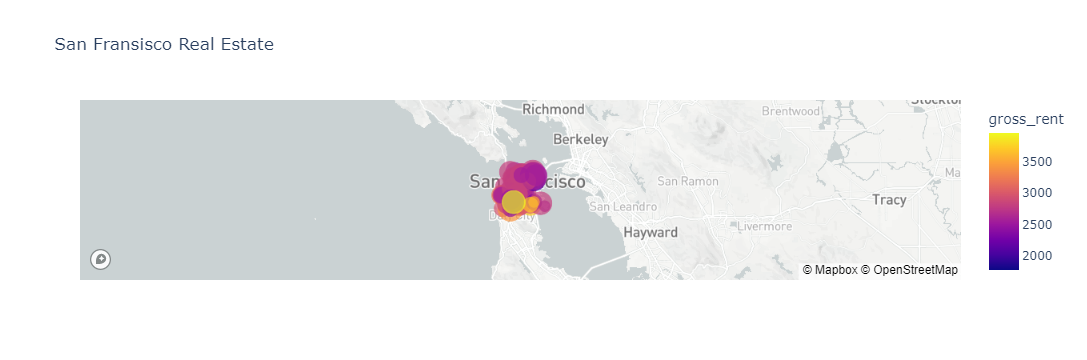

In [178]:
# Create a scatter mapbox to analyze neighborhood info
px.set_mapbox_access_token(Mapbox_API_key)
fig = px.scatter_mapbox(sf_neighborhoods, title=" San Fransisco Real Estate",
                        lat="Lat", lon="Lon", size="sale_price_sqr_foot", 
                        color="gross_rent", hover_name="Neighborhood")
fig.show()


## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [180]:
# Fetch the data from all expensive neighborhoods per year.
most_expensive_neighborhoods


,neighborhood,year,sale_price_sqr_foot,housing_units,gross_rent
65,Union Square District,2012.500000,903.993258,377427.50,2555.166667
36,Merced Heights,2014.000000,788.844818,380348.00,3414.000000
38,Miraloma Park,2011.750000,779.810842,375967.25,2155.250000
51,Pacific Heights,2013.000000,689.555817,378401.00,2817.285714
71,Westwood Park,2015.000000,687.087575,382295.00,3959.000000
63,Telegraph Hill,2013.000000,676.506578,378401.00,2817.285714
57,Presidio Heights,2013.000000,675.350212,378401.00,2817.285714
10,Cow Hollow,2013.000000,665.964042,378401.00,2817.285714
56,Potrero Hill,2013.000000,662.013613,378401.00,2817.285714
60,South Beach,2011.666667,650.124479,375805.00,2099.000000


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


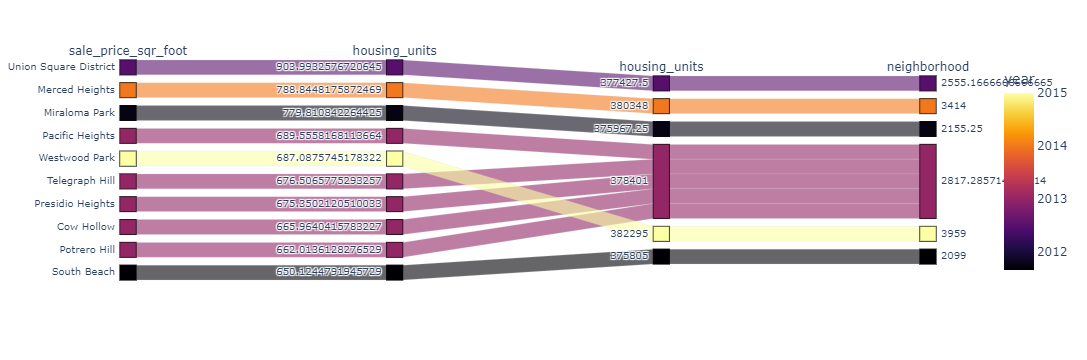

In [205]:
# Parallel Categories Plot
parallel_categories = px.parallel_categories(
    most_expensive_neighborhoods,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="year",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "sale_price_sqr_foot",
        "sale_price_sqr_foot": "housing_units",
        "gross_rent": "neighborhood",
    },
)
parallel_categories

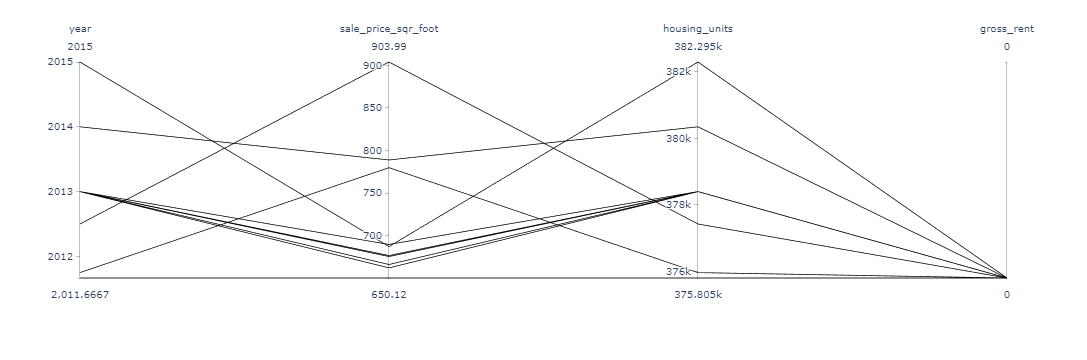

In [206]:
# Parallel Coordinates Plot
parallel_coordinates = px.parallel_coordinates(most_expensive_neighborhoods, color="gross_rent")
parallel_coordinates

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

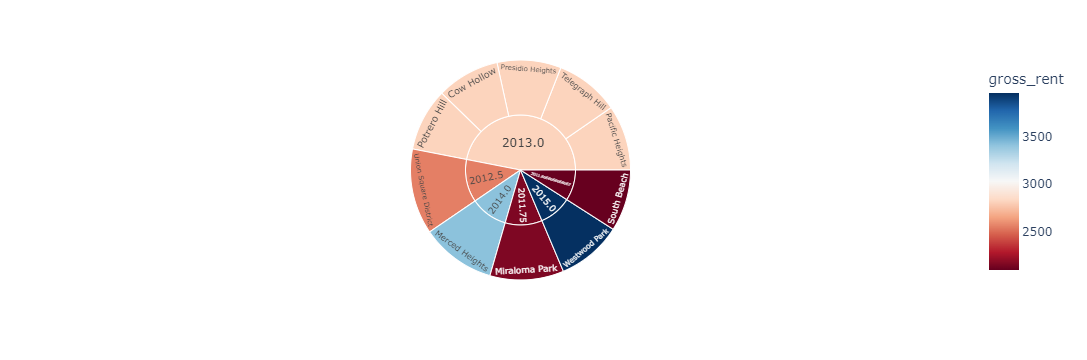

In [203]:
# Sunburst Plot

fig = px.sunburst(most_expensive_neighborhoods, path=["year", "neighborhood"], values="sale_price_sqr_foot",
                  color="gross_rent", hover_data=["sale_price_sqr_foot", "gross_rent"],
                  color_continuous_scale='RdBu')
fig.show()